In [116]:

# Hot training;
a = 767576576456458676318754176354766976


In [117]:
type(a)

int

In [118]:

# Hot training2;
b = 9.5555666


In [119]:
type(b)

float

In [120]:

# Hot training3;
c = '01/01/2000'


In [121]:
type(c)

str

In [122]:

# Hot training4;
d = True
e = False


In [123]:
type(d)
type(e)

bool

In [124]:

# Hot training5;
x = 123
x = 899
x


899

In [125]:

import keyword
keyword.kwlist


['False',
 'None',
 'True',
 'and',
 'as',
 'assert',
 'async',
 'await',
 'break',
 'class',
 'continue',
 'def',
 'del',
 'elif',
 'else',
 'except',
 'finally',
 'for',
 'from',
 'global',
 'if',
 'import',
 'in',
 'is',
 'lambda',
 'nonlocal',
 'not',
 'or',
 'pass',
 'raise',
 'return',
 'try',
 'while',
 'with',
 'yield']

In [126]:

# Hot training6;
def func(): 
    return print('Hello guyz..')
func()


Hello guyz..


# Getting started;
The code, starting with the import of libraries, proceeds with loading the dataset. It continues with printing the column names, renaming the columns, and converting the date column. Finally, it prints the first 5 rows of the DataFrame. In this code, first, the Pandas and Matplotlib libraries are imported, followed by loading the data from the CSV file. The Date column is renamed to make it more readable and processed into the appropriate date format. Finally, the first 5 rows of the dataset are printed. These steps can be considered as part of the data preprocessing phase. The dataset represents the gold bullion price in Turkey in terms of the London Ounce/Gold price (getted from EVDS system). It also includes a small exploratory analysis of the current active gold prices in Turkey.

In [127]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
onsgold = pd.read_csv("gold_london_ons.csv", delimiter=';')
print(onsgold.columns)
onsgold.rename(columns={'Tarih': 'Date'}, inplace=True)
onsgold['Date'] = pd.to_datetime(onsgold['Date'], errors='coerce')
print(onsgold.head())


Index(['Tarih', 'lon'], dtype='object')
        Date       lon
0 2012-03-01  1,675.80
1 2012-04-01  1,650.62
2 2012-05-01  1,596.43
3 2012-06-01  1,588.25
4 2012-07-01  1,594.93


The dataset represents the gold bullion price in Turkey in terms of the London Ounce/Gold price. The data processing steps above prepare the dataset by removing formatting issues (such as commas) and handling missing values. Since we explicitly dropped any rows with missing Date or lon values, we ensure that there are no missing observations in the dataset. The resulting plot provides a visual representation of how the gold price, measured in ounces according to the London Index, has evolved over time. 

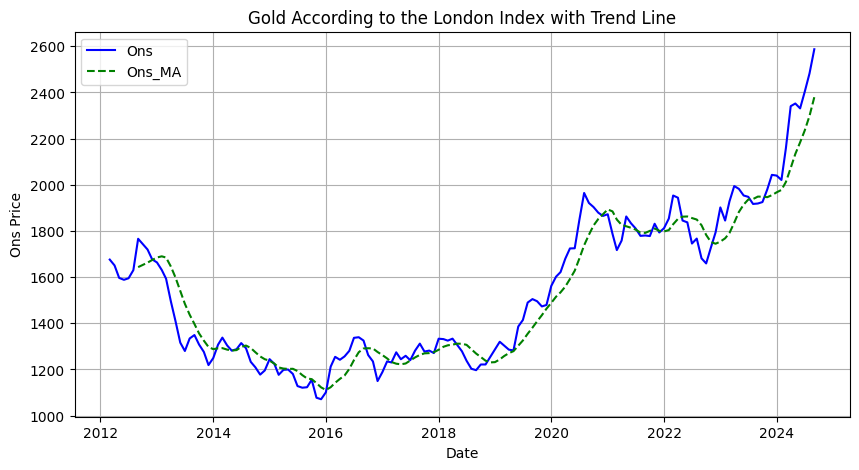

In [133]:

onsgold['lon'] = onsgold['lon'].astype(str)
onsgold['lon'] = onsgold['lon'].replace({',': ''}, regex=True).astype(float)
onsgold.dropna(subset=['Date', 'lon'], inplace=True)
onsgold['Date'] = pd.to_datetime(onsgold['Date'])
onsgold['trend'] = onsgold['lon'].rolling(window=7).mean()
plt.figure(figsize=(10, 5))
plt.plot(onsgold['Date'], onsgold['lon'], label='Ons', color='blue')
plt.plot(onsgold['Date'], onsgold['trend'], label='Ons_MA', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Ons Price')
plt.title('Gold According to the London Index with Trend Line')
plt.grid(True)
plt.legend()
plt.show()


This code creates a histogram for the gold price data represented by longitude. First, the figure size is set using `plt.figure()`. Then, the histogram is plotted with the `plt.hist()` function, where the 'lon' column data is divided into 20 bins, with black edges and a linewidth of 1.2 for each bin. Labels for the x-axis, y-axis, and the title are added using `plt.xlabel()`, `plt.ylabel()`, and `plt.title()` functions. Finally, the plot is displayed with `plt.show()`.

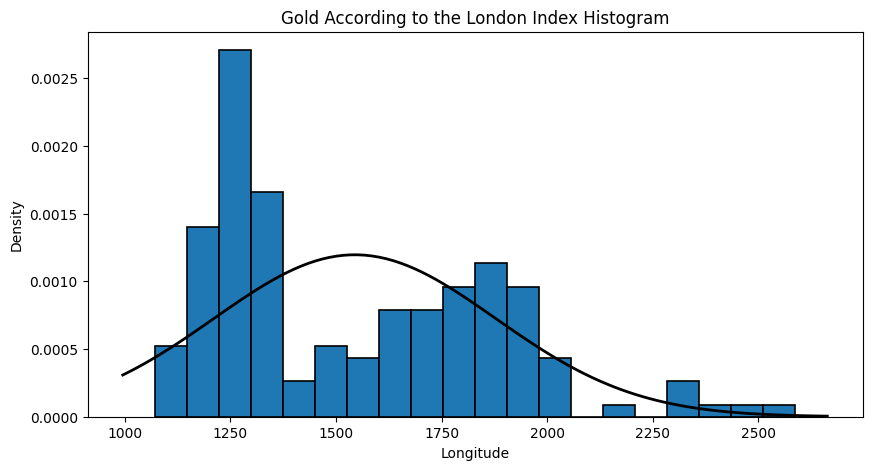

In [129]:

# Histogramı oluştur (density=True, so that the histogram data will be plotted as intensity)
plt.figure(figsize=(10, 5))
plt.hist(onsgold['lon'], bins=20, edgecolor='black', linewidth=1.2, density=True)
mean, std_dev = stats.norm.fit(onsgold['lon'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Longitude')
plt.ylabel('Density')
plt.title('Gold According to the London Index Histogram')
plt.show()


This code uses moving average (MA) techniques to analyze and visualize the movement of gold prices over time. First, 7-day and 30-day moving averages are calculated. These moving averages are used to observe short-term and long-term price trends. The 7-day moving average reflects short-term trends by taking the average of the last 7 days, while the 30-day moving average shows longer-term trends. Along with these calculated moving averages, the actual gold prices (gold ounce prices) are visualized over time using the matplotlib library. The chart displays the actual prices in blue, the 7-day moving average in green, and the 30-day moving average in red. The chart is made more readable with features such as title, axis labels, grid lines, and a legend.

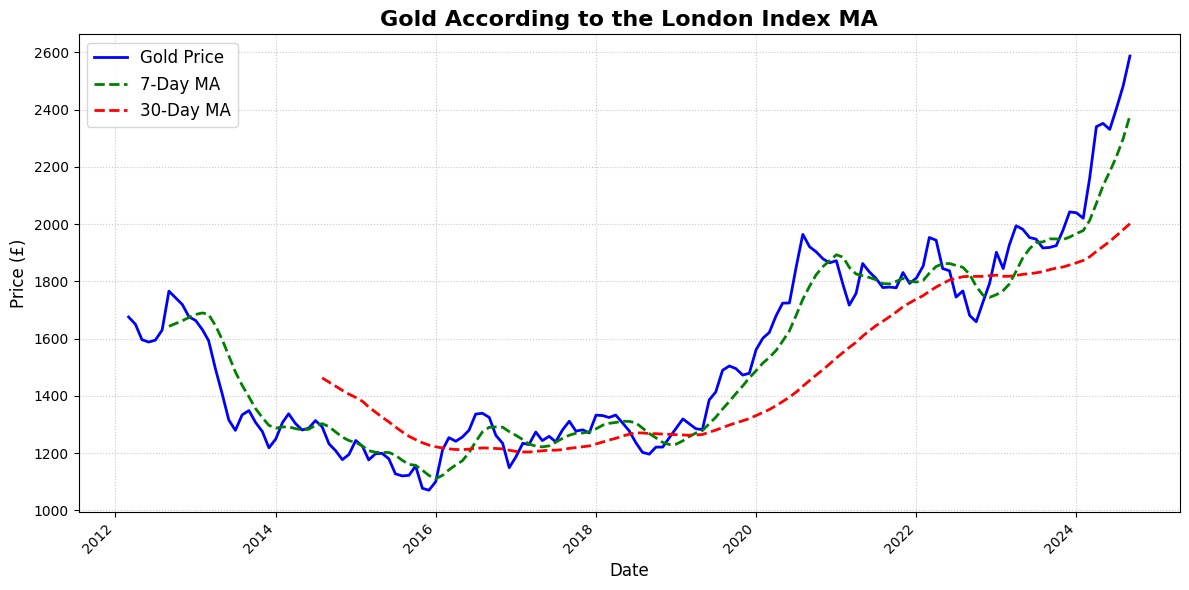

In [135]:

onsgold['7_day_ma'] = onsgold['lon'].rolling(window=7).mean()
onsgold['30_day_ma'] = onsgold['lon'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(onsgold['Date'], onsgold['lon'], label='Gold Price', color='blue', linewidth=2)
plt.plot(onsgold['Date'], onsgold['7_day_ma'], label='7-Day MA', color='green', linestyle='--', linewidth=2)
plt.plot(onsgold['Date'], onsgold['30_day_ma'], label='30-Day MA', color='red', linestyle='--', linewidth=2)
plt.title('Gold According to the London Index MA', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


### Mathematical Representation of Moving Averages (MA)

For a time series \( x_t \), the moving average at time \( t \) for a given window \( w \) (in this case, 7 and 30 days) is calculated as the average of the previous \( w \) values.

#### 7-Day Moving Average (MA):

\[
\text{MA}_7(t) = \frac{1}{7} \sum_{i=0}^{6} x_{t-i}
\]

Where:

- \( \text{MA}_7(t) \) is the 7-day moving average at time \( t \).
- \( x_{t-i} \) is the value of the time series at \( t-i \), with \( i = 0, 1, 2, \dots, 6 \).

#### 30-Day Moving Average (MA):

\[
\text{MA}_{30}(t) = \frac{1}{30} \sum_{i=0}^{29} x_{t-i}
\]

Where:

- \( \text{MA}_{30}(t) \) is the 30-day moving average at time \( t \).
- \( x_{t-i} \) is the value of the time series at \( t-i \), with \( i = 0, 1, 2, \dots, 29 \).

These moving averages are used to smooth out short-term fluctuations in the data and help in identifying longer-term trends. The 7-day moving average reacts more quickly to recent price changes, while the 30-day moving average provides a smoother curve, representing longer-term trends in the data.


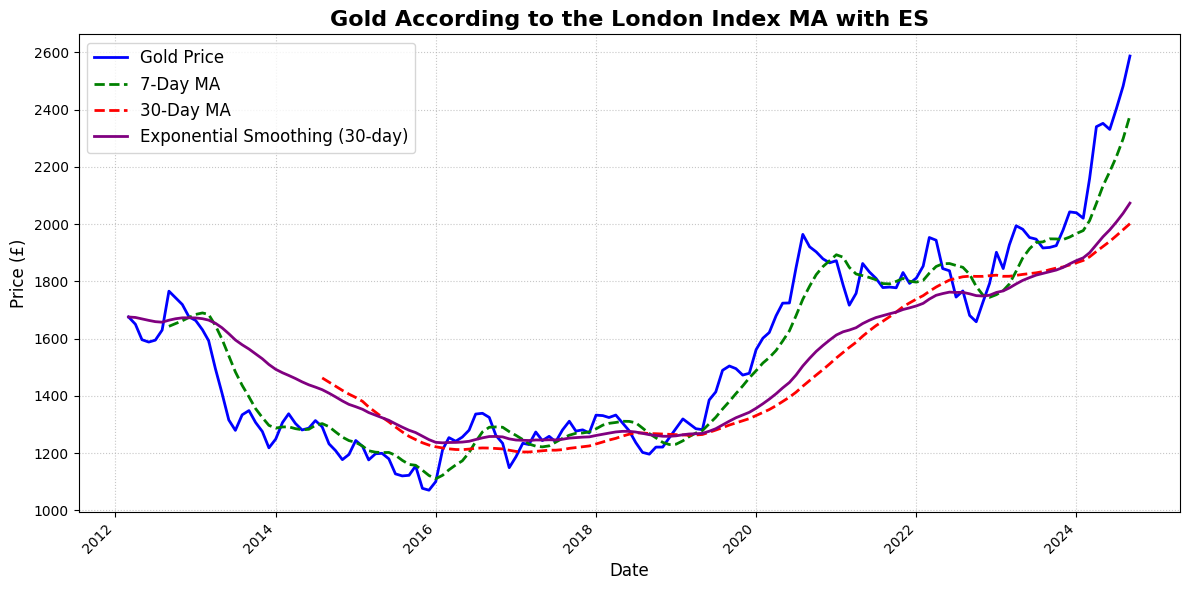

In [137]:

# Alogn with Exponential Smoothing;
onsgold['exponential_smoothing'] = onsgold['lon'].ewm(span=30, adjust=False).mean()
plt.figure(figsize=(12, 6))
plt.plot(onsgold['Date'], onsgold['lon'], label='Gold Price', color='blue', linewidth=2)
plt.plot(onsgold['Date'], onsgold['7_day_ma'], label='7-Day MA', color='green', linestyle='--', linewidth=2)
plt.plot(onsgold['Date'], onsgold['30_day_ma'], label='30-Day MA', color='red', linestyle='--', linewidth=2)
plt.plot(onsgold['Date'], onsgold['exponential_smoothing'], label='Exponential Smoothing (30-day)', color='purple', linestyle='-', linewidth=2)
plt.title('Gold According to the London Index MA with ES', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()
